In [1]:
%matplotlib inline


# Spectral clustering for image segmentation

In this example, an image with connected circles is generated and
spectral clustering is used to separate the circles.

In these settings, the `spectral_clustering` approach solves the problem
know as 'normalized graph cuts': the image is seen as a graph of
connected voxels, and the spectral clustering algorithm amounts to
choosing graph cuts defining regions while minimizing the ratio of the
gradient along the cut, and the volume of the region.

As the algorithm tries to balance the volume (ie balance the region
sizes), if we take circles with different sizes, the segmentation fails.

In addition, as there is no useful information in the intensity of the image,
or its gradient, we choose to perform the spectral clustering on a graph
that is only weakly informed by the gradient. This is close to performing
a Voronoi partition of the graph.

In addition, we use the mask of the objects to restrict the graph to the
outline of the objects. In this example, we are interested in
separating the objects one from the other, and not from the background.


In [2]:
# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

## Generate the data



In [3]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

## Plotting four circles



In [4]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

Convert the image into a graph with the value of the gradient on the
edges.



In [5]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

Take a decreasing function of the gradient resulting in a segmentation
that is close to a Voronoi partition



In [6]:
graph.data = np.exp(-graph.data / graph.data.std())

Here we perform spectral clustering using the arpack solver since amg is
numerically unstable on this example. We then plot the results.



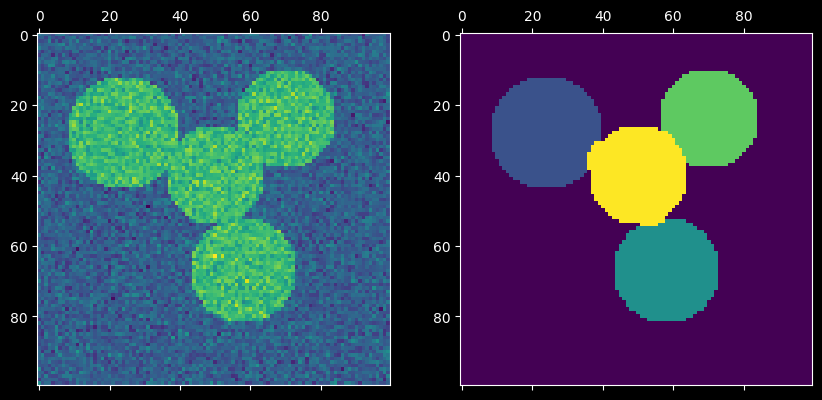

In [7]:
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

## Plotting two circles
Here we repeat the above process but only consider the first two circles
we generated. Note that this results in a cleaner separation between the
circles as the region sizes are easier to balance in this case.



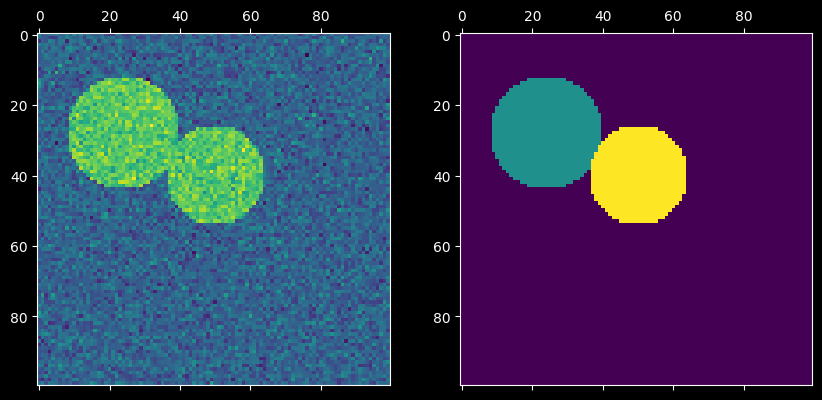

In [8]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()